## Load the dataset

**Dataset Link:**
**https://www.kaggle.com/datasets/taeefnajib/house-rent-in-dhaka-city/data**

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
df=pd.read_csv('houserentdhaka.csv')
df.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


**We need to drop unnamed: 0 column because it doesnt put any impact in our prediction**

In [99]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


**Now we can see our dataset have two columns named Price and Area where we need just the number, not that string like- Thousand,sqft etc. So now we clean that**

In [100]:
multiplier= {
    'Thousand': 1000,
    'Lakh': 100000,
    'Million': 1000000,
    'Crore': 10000000
}

def clean_price(price):
    parts = str(price).split()

    if len(parts)==2:
        num,prefix = parts
        return float(num) * multiplier.get(prefix,1)
    else:
        return float(parts[0])

df['Price']=df['Price'].apply(clean_price)

In [101]:
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20000.0
1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20000.0
2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18000.0
3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75000.0
4,"Baridhara, Dhaka","2,200 sqft",3,3,75000.0


In [102]:
df['Area']=df['Area'].str.replace(',','').str.replace('sqft','').astype(int)

In [103]:
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000.0
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000.0
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000.0
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000.0
4,"Baridhara, Dhaka",2200,3,3,75000.0


In [104]:
df['Area'].dtype

dtype('int64')

**Now we need to work on Location Column**

**At first we check if all location ended with dhaka or not**

In [105]:
df['Location'].str.strip().str.endswith('Dhaka').all()  ## if this return false that mean all column doesnt ended with Dhaka
                                                        ## if return true then that means all column ended with Dhaka string

np.True_

**It means all of our location column ended with Dhaka, So now we should remove it.**

In [106]:
df['Location']=df['Location'].str.strip().str.removesuffix(", Dhaka")

In [107]:
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A",1600,3,3,20000.0
1,"Farmgate, Tejgaon",900,2,2,20000.0
2,"Block B, Nobodoy Housing Society, Mohammadpur",1250,3,3,18000.0
3,"Gulshan 1, Gulshan",2200,3,4,75000.0
4,Baridhara,2200,3,3,75000.0


**Before further going now we will check what is the condition in our current dataframe**

In [108]:
df.Area.isnull().sum()

np.int64(0)

In [109]:
df.Bed.isnull().sum()

np.int64(0)

In [110]:
df.Bath.isnull().sum()

np.int64(0)

In [111]:
df.Price.isnull().sum()

np.int64(0)

**So all of these column has values, so now we move on next step to work on Location column to make it more usable**

**So now we can look towards bigger picture like a location called 'Bashundhara R-A' not very specific like 'Block H, Bashundhara R-A'. Beacuse the rent price is almost similar.**

In [112]:
df['Location']=df['Location'].apply(lambda x:x.split(',')[-1].strip())

In [113]:
df.head()

,Location,Area,Bed,Bath,Price
0,Bashundhara R-A,1600,3,3,20000.0
1,Tejgaon,900,2,2,20000.0
2,Mohammadpur,1250,3,3,18000.0
3,Gulshan,2200,3,4,75000.0
4,Baridhara,2200,3,3,75000.0


**How many unique values are there in a column and what is that?**

In [114]:
df['Location'].unique()

array(['Bashundhara R-A', 'Tejgaon', 'Mohammadpur', 'Gulshan',
       'Baridhara', 'Hazaribag', 'Mirpur', 'Nikunja', 'Uttara',
       'Khilgaon', 'Ibrahimpur', 'Badda', 'Adabor', 'Jatra Bari',
       'Malibagh', 'Banani', 'Kakrail', 'Dhanmondi', 'Maghbazar',
       'Kalachandpur', 'Niketan', 'Eskaton', 'Banasree', 'Bashabo',
       'Baridhara DOHS', 'Aftab Nagar', 'Lalmatia', 'Dakshin Khan',
       'Mohakhali DOHS', 'Sutrapur', 'Hatirpool', 'Agargaon', 'Rampura',
       'Cantonment', 'Shahbagh', 'Khilkhet', 'Motijheel', 'Shantinagar',
       'Shegunbagicha', 'Kathalbagan', 'Shyamoli', 'Kalabagan', 'Demra',
       'Kuril', 'Mohakhali', 'Lalbagh', 'New Market', 'Kafrul',
       'Kachukhet', 'Turag', 'Dhaka', 'Nadda', 'Shyampur', 'Maniknagar',
       'Banani DOHS', 'Shiddheswari', 'Bangshal', 'Paribagh',
       'Joar Sahara', 'Mugdapara', 'North Shahjahanpur', 'Kotwali',
       'Shahjahanpur', 'Uttar Khan', 'Taltola', 'Sadarghat',
       'Banglamotors', 'Zafrabad', 'Keraniganj'], dtype=ob

In [115]:
df['Location'].nunique()

69

In [116]:
df['Location'].value_counts()

Location
Mirpur             8451
Mohammadpur        3612
Uttara             2070
Badda              1831
Bashundhara R-A    1397
                   ... 
Demra                 7
Zafrabad              7
Keraniganj            3
Banglamotors          2
Sadarghat             2
Name: count, Length: 69, dtype: int64

**At first we consider Bed column, lets see which rows and data seems logical and which one should be removed**

In [117]:
df['Bed'].describe()

count    28800.000000
mean         2.511076
std          0.601353
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Bed, dtype: float64

In [118]:
df['Bed'].unique()

array([3, 2, 4, 1, 5, 6])

**6 bedroom seems logical for large flat or apartment. So we will move further**

**Now we analyze Bath column**

In [119]:
df['Bath'].unique()

array([3, 2, 4, 5, 1, 6, 8])

**We can see that some column has 5 to 8 bathroom while max bedroom is 6.So it is irrelevant. We should remove those rows**

In [120]:
df=df[df['Bath']<=5]
df['Bath'].unique()

array([3, 2, 4, 5, 1])

In [121]:
df['Price'].describe()

count     28792.000000
mean      20969.924285
std       21305.207670
min        5000.000000
25%       13000.000000
50%       16000.000000
75%       22000.000000
max      650000.000000
Name: Price, dtype: float64

In [122]:
q95=df['Price'].quantile(0.95)
df=df[df['Price']<=q95]
df['Price'].describe()

count    27359.000000
mean     17632.322453
std       6867.128512
min       5000.000000
25%      13000.000000
50%      16000.000000
75%      20000.000000
max      44000.000000
Name: Price, dtype: float64

In [123]:
df_under_5000=df[df['Price']<7000]
df_under_5000

,Location,Area,Bed,Bath,Price
194,Adabor,400,1,1,5000.0
330,Mirpur,400,1,1,6500.0
1204,Dakshin Khan,450,2,1,6300.0
1577,Mirpur,500,1,1,6500.0
1696,Dakshin Khan,400,2,1,6300.0
1714,Mirpur,300,1,1,5500.0


**All data for price column seems logical in Dhaka context**

In [125]:
df.shape

(27359, 5)

## Visualize some data

**Visualize for House Price vs Area**

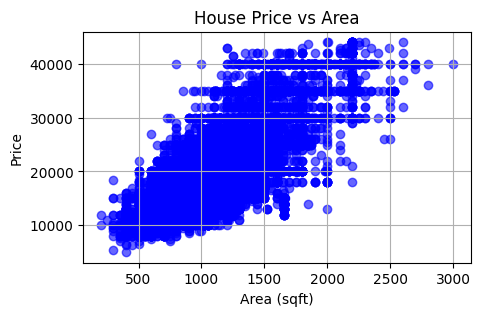

In [127]:
plt.figure(figsize=(5,3))
plt.scatter(df['Area'], df['Price'], alpha=0.6, color='blue')

# Labels and title
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.title('House Price vs Area')

# Optional: grid
plt.grid(True)

# Show plot
plt.show()

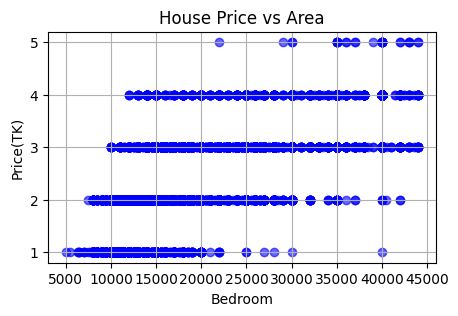

In [130]:
plt.figure(figsize=(5,3))
plt.scatter(df['Price'], df['Bath'], alpha=0.6, color='blue')

# Labels and title
plt.xlabel('Bedroom')
plt.ylabel('Price(TK)')
plt.title('House Price vs Area')

# Optional: grid
plt.grid(True)

# Show plot
plt.show()

**Visualize for bathroom data**

Text(0, 0.5, 'count')

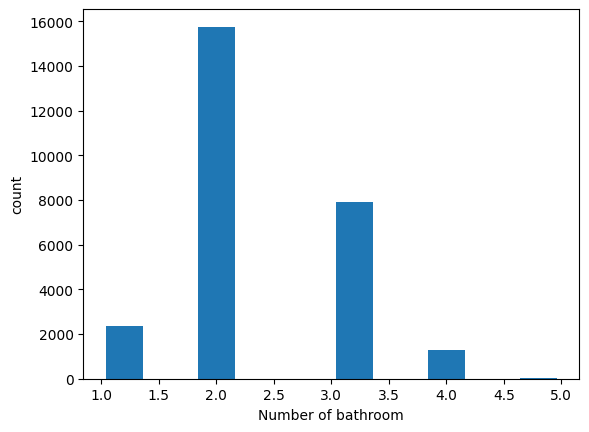

In [134]:
plt.hist(df.Bath,rwidth=0.8)
plt.xlabel("Number of bathroom")
plt.ylabel("count")

**Visualize for bedroom data**

Text(0, 0.5, 'count')

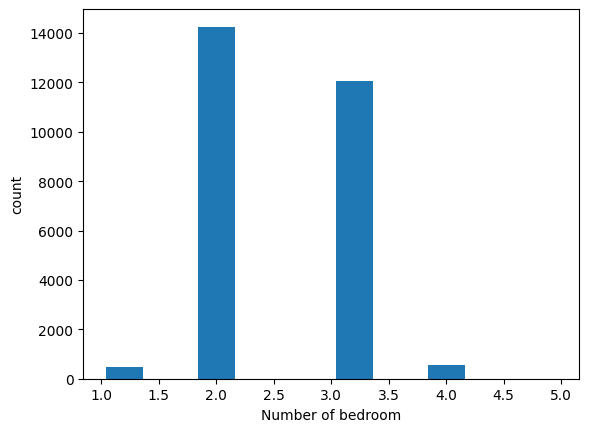

In [132]:
plt.hist(df.Bed,rwidth=0.8)
plt.xlabel("Number of bedroom")
plt.ylabel("count")

## **One hot encoding**